In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter


In [2]:
df = pd.read_csv('hakaton.csv',sep =';')

Очистка датасета для дальнейшей обработки 

In [6]:
df.head()

,id,order_id,customer_id,entity_id,create_datetime
0,2220916,1325312,9172,13,2019-04-24 17:20:56
1,2220917,1325312,9172,379,2019-04-24 17:20:56
2,2220918,1325312,9172,465,2019-04-24 17:20:56
3,2230948,1331271,9173,363,2019-04-25 21:10:36
4,2234582,1333417,9172,238,2019-04-26 12:27:35


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2521078 entries, 0 to 2521077
Data columns (total 5 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   id               int64 
 1   order_id         int64 
 2   customer_id      int64 
 3   entity_id        int64 
 4   create_datetime  object
dtypes: int64(4), object(1)
memory usage: 96.2+ MB


Выполнен обзор данных, описаны столбцы и предметная область. Таблица содержит следующие столбцы:
id - id записи
order_id - id заказа
customer_id - id гостя
entity_id -  id товара
create_datetime - Дата и время заказа

In [ ]:
df = df.drop_duplicates()

In [10]:
df['create_datetime'] = pd.to_datetime(df['create_datetime'])

In [ ]:
df.head()

In [ ]:
df.info()

In [12]:
# Функция для определения времени года
def get_season(date):
    if date.month in [12, 1, 2]:
        return 'Зима'
    elif date.month in [3, 4, 5]:
        return 'Весна'
    elif date.month in [6, 7, 8]:
        return 'Лето'
    else:
        return 'Осень'


In [14]:
# Добавление нового столбца с временем года
df['season'] = df['create_datetime'].apply(get_season)


In [15]:
df.head()

,id,order_id,customer_id,entity_id,create_datetime,season
0,2220916,1325312,9172,13,2019-04-24 17:20:56,Весна
1,2220917,1325312,9172,379,2019-04-24 17:20:56,Весна
2,2220918,1325312,9172,465,2019-04-24 17:20:56,Весна
3,2230948,1331271,9173,363,2019-04-25 21:10:36,Весна
4,2234582,1333417,9172,238,2019-04-26 12:27:35,Весна


In [29]:
tp_mapping = {
        'Утро': 1,
        'День': 2,
        'Вечер': 3,
        'Обед': 4,
        'Ночь': 5
    
    }
# Заменяем значения в столбце 'bfbf' по словарю season_mapping
df['time_period'] = df['time_period'].replace(tp_mapping)
df

/var/folders/d0/tmdn3xk56ql7h6w6yt26xlsr0000gn/T/ipykernel_27451/3225352137.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['time_period'] = df['time_period'].replace(tp_mapping)


,id,order_id,customer_id,entity_id,create_datetime,season,time_period
0,2220916,1325312,9172,13,2019-04-24 17:20:56,4,3
1,2220917,1325312,9172,379,2019-04-24 17:20:56,4,3
2,2220918,1325312,9172,465,2019-04-24 17:20:56,4,3
3,2230948,1331271,9173,363,2019-04-25 21:10:36,4,3
4,2234582,1333417,9172,238,2019-04-26 12:27:35,4,1
...,...,...,...,...,...,...,...
2521073,7361300,4390973,82358,545,2021-01-01 15:50:35,3,2
2521074,7361299,4390973,82358,789,2021-01-01 15:50:35,3,2
2521075,7361128,4390881,95990,594,2021-01-01 15:03:05,3,2
2521076,7361057,4390844,44144,542,2021-01-01 14:34:52,3,2


In [27]:

season_mapping = {
        'Зима': 3,
        'Весна': 4,
        'Лето': 2,
        'Осень': 1
    }
# Заменяем значения в столбце 'bfbf' по словарю season_mapping
df['season'] = df['season'].replace(season_mapping)
df
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2521078 entries, 0 to 2521077
Data columns (total 7 columns):
 #   Column           Dtype         
---  ------           -----         
 0   id               int64         
 1   order_id         int64         
 2   customer_id      int64         
 3   entity_id        int64         
 4   create_datetime  datetime64[ns]
 5   season           int64         
 6   time_period      object        
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 134.6+ MB


/var/folders/d0/tmdn3xk56ql7h6w6yt26xlsr0000gn/T/ipykernel_27451/286302540.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['season'] = df['season'].replace(season_mapping)


In [18]:
# Функция для определения времени покупки
def get_time_period(dt):
    hour = dt.hour
    if 6 <= hour < 13:
        return 'Утро'
    elif 13 <= hour < 14:
        return 'Обед'
    elif 14 <= hour < 17:
        return 'День'
    elif 17 <= hour < 24:
        return 'Вечер'
    else:
        return 'Ночь'



In [303]:
 #Применяем функцию к столбцу create_datetime
 df['time_period2'] = df['create_datetime'].apply(get_time_period)

In [58]:
df

,id,order_id,customer_id,entity_id,create_datetime,season,time_period
0,2220916,1325312,9172,13,2019-04-24 17:20:56,4,3
1,2220917,1325312,9172,379,2019-04-24 17:20:56,4,3
2,2220918,1325312,9172,465,2019-04-24 17:20:56,4,3
3,2230948,1331271,9173,363,2019-04-25 21:10:36,4,3
4,2234582,1333417,9172,238,2019-04-26 12:27:35,4,1
...,...,...,...,...,...,...,...
2521073,7361300,4390973,82358,545,2021-01-01 15:50:35,3,2
2521074,7361299,4390973,82358,789,2021-01-01 15:50:35,3,2
2521075,7361128,4390881,95990,594,2021-01-01 15:03:05,3,2
2521076,7361057,4390844,44144,542,2021-01-01 14:34:52,3,2


In [33]:
value_counts_time_period = df['time_period'].value_counts()
value_counts_season = df['season'].value_counts()
value_counts_customer_id = df['customer_id'].value_counts()
value_counts_entity_id = df['entity_id'].value_counts()

Как мы видим самое большое количество продаж утром, а самое маленькое Ночью

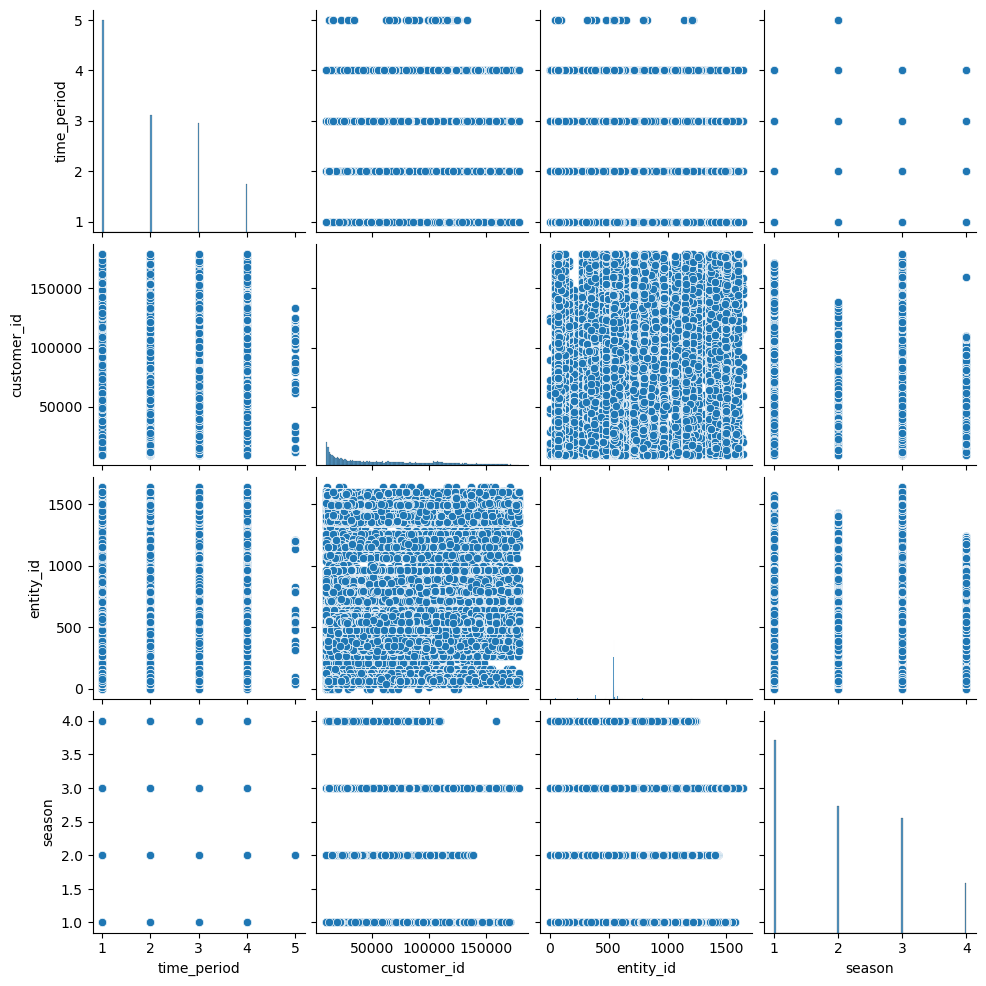

In [36]:
sns.pairplot(df[['time_period','customer_id','entity_id','season']])

In [ ]:
value_counts_time_period

In [ ]:
value_counts_season


In [ ]:
value_counts_customer_id

In [ ]:
value_counts_entity_id

/var/folders/d0/tmdn3xk56ql7h6w6yt26xlsr0000gn/T/ipykernel_27451/2005835554.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=value_counts_season.index, y=value_counts_season.values, palette=colors)


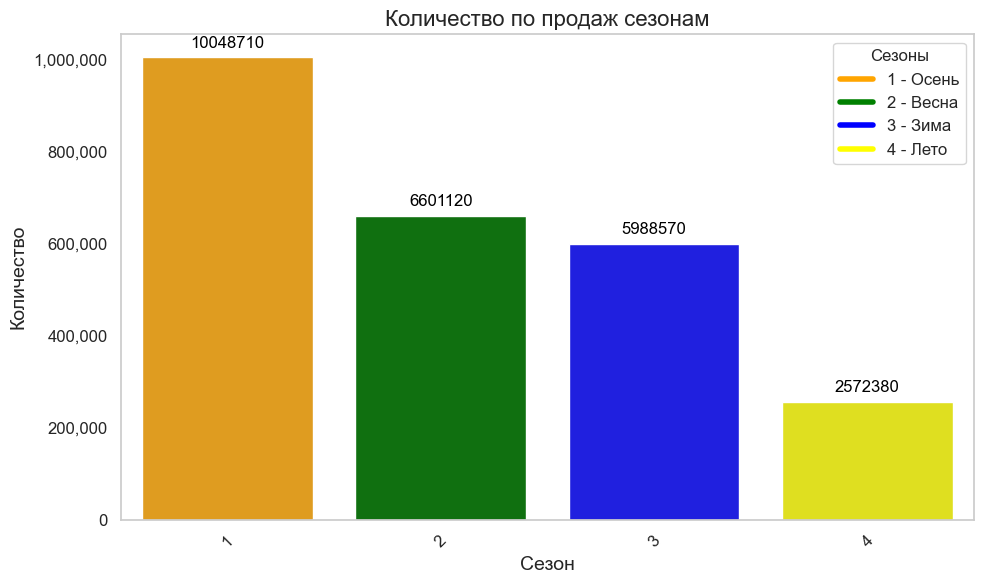

In [52]:
# Установка стиля Seaborn
sns.set(style='whitegrid')

# Создание фигуры и осей
plt.figure(figsize=(10, 6))

# Определение цветов для каждого сезона
colors = ['orange', 'green', 'blue', 'yellow']  # Осень, Весна, Зима, Лето

# Создание столбчатой диаграммы с Seaborn
bar_plot = sns.barplot(x=value_counts_season.index, y=value_counts_season.values, palette=colors)

# Добавление заголовка и меток
plt.title('Количество по продаж сезонам', fontsize=16)
plt.xlabel('Сезон', fontsize=14)
plt.ylabel('Количество', fontsize=14)

# Функция для форматирования значений на оси Y
def thousands_formatter(x, pos):
    return f'{int(x * 1):,}'  # Умножаем на 100000 и форматируем

# Применение форматтера к оси Y
bar_plot.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Добавление аннотаций на столбцы
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height() * 10)}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=12, color='black', 
                      xytext=(0, 5), 
                      textcoords='offset points')

# Улучшение оформления
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y')

# Добавление легенды
seasons = ['1 - Осень', '2 - Весна', '3 - Зима', '4 - Лето']
handles = [plt.Line2D([0], [0], color=colors[i], lw=4, label=seasons[i]) for i in range(len(seasons))]
plt.legend(handles=handles, title="Сезоны", fontsize=12)

# Показать диаграмму
plt.tight_layout()
plt.show()


Выводы:
Утро — наиболее популярный период покупок (1,100,293 транзакции).
Обед и Ночь — минимальная активность (247,455 и 157 транзакций соответственно).
День и Вечер — умеренная активность.
Что можно сделать?


Рекомендации по времени:
Для клиентов, покупающих утром, предлагать популярные товары со скидкой (например, кофе, выпечку), чтобы повысить их лояльность.
Для клиентов, редко совершающих покупки днем или вечером, предлагать эксклюзивные вечерние скидки (например, "С 17:00 до 19:00 скидка 15% на десерты").


Увеличение продаж в низкоактивное время:
Запуск акций для стимуляции покупок в обеденное время и ночью: 
Обед: "Скидка 20% на набор: кофе + десерт с 13:00 до 14:00".
Ночь: "Поздний кофе: скидка 30% на все позиции после 22:00".


2. Анализ по сезонам (season)
Выводы:
Осень — пик покупок (1,004,871 транзакция).
Весна — минимальная активность (257,238 транзакций).
Что можно сделать?
Сезонные предложения:
Осенью и зимой: акцент на горячие напитки (например, "Осенний капучино" или "Зимний латте").
Весной и летом: холодные напитки, мороженое или легкие десерты.
Повышение продаж в низкий сезон:
Весной: стимулировать интерес с помощью скидок или акций на популярные товары.
Летом: предлагать бонусы за частые заказы (например, 5 заказов — 6-й бесплатно).
Сезонные акции:
"Осенний выбор: при покупке напитка десерт за полцены".
"Летнее предложение: 2 напитка по цене одного на холодные коктейли".


3. Анализ по клиентам (customer_id)
Выводы:
Повторяющиеся покупатели: Некоторые клиенты совершают большое количество заказов (например, customer_id = 52078 — 2116 заказов).
Редкие покупатели: Большинство клиентов совершили 1–2 заказа.
Что можно сделать?
Сегментация клиентов:
VIP-клиенты (постоянные): Предлагать бонусы за лояльность, например, накопительные скидки или персональные подарки.
Новые клиенты: Приветственные предложения (например, скидка 10% на первый заказ).
Потерянные клиенты: Для тех, кто давно не делал заказ, отправлять персональные напоминания: "Мы скучаем! Вернитесь за кофе с 20% скидкой".
Анализ поведения:
Определить, какие товары чаще покупают VIP-клиенты, чтобы предложить им комбинации или апселлы.
Выявить, что заказывают клиенты с низкой активностью, и предложить похожие товары с выгодой.
Лояльность:
Создать программу лояльности: 
Баллы за покупки.
Лимитированные предложения для постоянных клиентов.


In [ ]:
df

In [ ]:
df = df.drop(columns=['prev_purchase'])


df = df.drop(columns=['purchase_interval'])




In [295]:
# 2. День недели
df['day_of_week'] = df['create_datetime'].dt.day_name()

In [ ]:
# 3. Частота покупок по каждому клиенту
frequency = df.groupby('customer_id').size().reset_index(name='frequency')
df = df.merge(frequency, on='customer_id', how='left')

In [ ]:
data = df

In [ ]:
# 1. Регулярность покупки (интервал между покупками для каждого клиента)
data['prev_purchase'] = data.groupby('customer_id')['create_datetime'].shift(1)
data['purchase_interval'] = (data['create_datetime'] - data['prev_purchase']).dt.days


In [ ]:
df.head(50)

In [ ]:
value_counts_day_of_week = df['day_of_week'].value_counts()

In [ ]:
value_counts_day_of_week

In [ ]:
# Словарь для преобразования дней недели на русский язык
days_translation = {
    'Monday': 'Понедельник',
    'Tuesday': 'Вторник',
    'Wednesday': 'Среда',
    'Thursday': 'Четверг',
    'Friday': 'Пятница',
    'Saturday': 'Суббота',
    'Sunday': 'Воскресенье'
}

# Применяем преобразование
df['day_of_week'] = df['day_of_week'].map(days_translation)


In [297]:
df.head()

,id,order_id,customer_id,entity_id,create_datetime,season,time_period,days_since_last_purchase,day_of_week
0,2220916,1325312,9172,13,2019-04-24 17:20:56,4,3,618,Wednesday
1,2220917,1325312,9172,379,2019-04-24 17:20:56,4,3,618,Wednesday
2,2220918,1325312,9172,465,2019-04-24 17:20:56,4,3,618,Wednesday
3,2230948,1331271,9173,363,2019-04-25 21:10:36,4,3,617,Thursday
4,2234582,1333417,9172,238,2019-04-26 12:27:35,4,1,616,Friday


In [ ]:
order_counts = df.groupby('order_id').size().reset_index(name='product_count')

# Объединяем оригинальный датафрейм с новым датафреймом, содержащим количество продуктов
df_with_counts = pd.merge(df, order_counts, on='order_id')

# Просмотр результата
print(df_with_counts)


In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [309]:
orders_by_time = df["time_period2"].value_counts()
orders_by_time

time_period2
Утро     1100293
День      606804
Вечер     566369
Обед      247455
Ночь         157
Name: count, dtype: int64

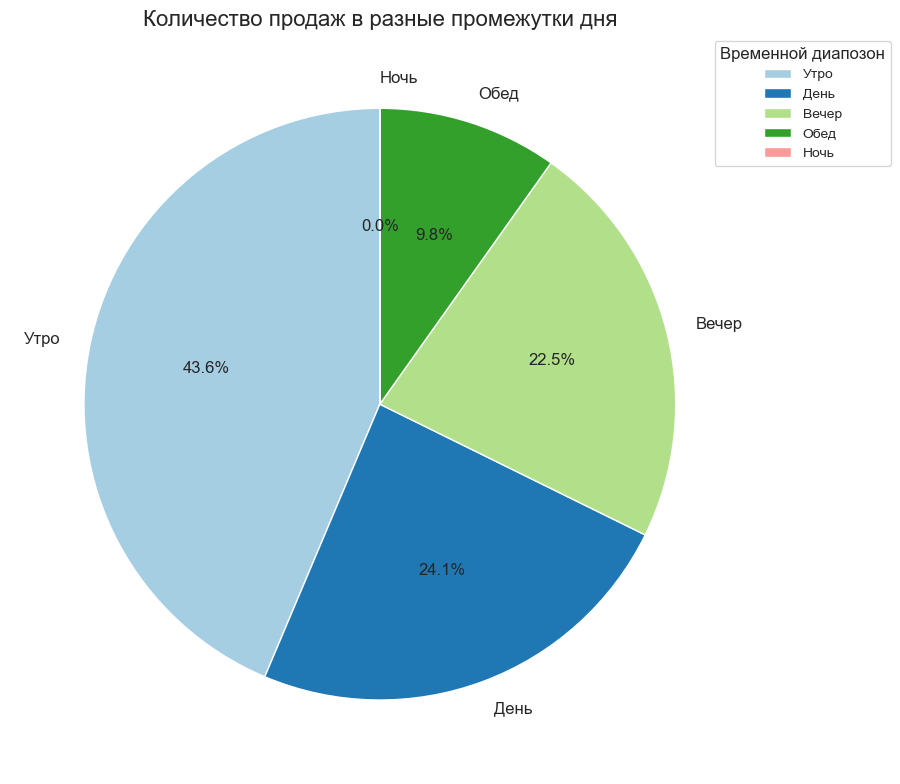

In [313]:
# Mock dataset creation based on provided structure 




 
# Grouping by day_of_week and counting orders 
orders_by_time = df["time_period2"].value_counts() 
 
# Plot pie chart 
plt.figure(figsize=(10, 8)) 
colors = plt.cm.Paired.colors  # Use a visually appealing colormap 
orders_by_time.plot.pie( 
    autopct='%1.1f%%',  
    colors=colors,  
    startangle=90,  
    textprops={'fontsize': 12} 
) 
 
# Add title and legend 
plt.title('Количество продаж в разные промежутки дня', fontsize=16) 
plt.ylabel('')  # Hide the default y-axis label 
plt.legend(orders_by_time.index, title="Временной диапозон", loc="upper right", bbox_to_anchor=(1.2, 1.0), fontsize=10) 
 
plt.tight_layout() 
plt.show()

/var/folders/d0/tmdn3xk56ql7h6w6yt26xlsr0000gn/T/ipykernel_27451/535976463.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


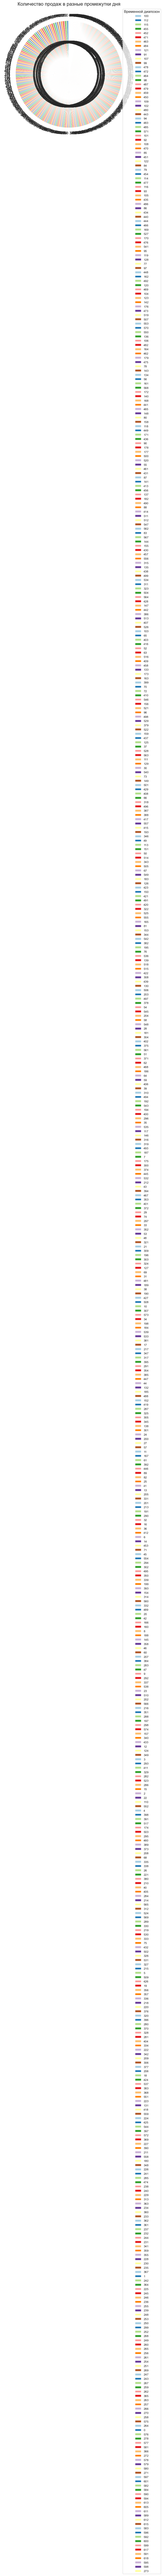

In [324]:
# Mock dataset creation based on provided structure 




 
# Grouping by day_of_week and counting orders 
orders_by_ = value_counts_
 
# Plot pie chart 
plt.figure(figsize=(10, 8)) 
colors = plt.cm.Paired.colors  # Use a visually appealing colormap 
orders_by_.plot.pie( 
    autopct='%1.1f%%',  
    colors=colors,  
    startangle=90,  
    textprops={'fontsize': 12} 
) 
 
# Add title and legend 
plt.title('Количество продаж в разные промежутки дня', fontsize=16) 
plt.ylabel('')  # Hide the default y-axis label 
plt.legend(orders_by_.index, title="Временной диапозон", loc="upper right", bbox_to_anchor=(1.2, 1.0), fontsize=10) 
 
plt.tight_layout() 
plt.show()

In [ ]:
# Генерируем ассоциативные правила
rules = association_rules(frequent_items, metric="lift", min_threshold=1)


In [ ]:
basket

In [ ]:
print(transaction.head())


In [ ]:
   transaction = transaction.drop_duplicates()
   

In [ ]:
# Создание матрицы товаров
basket = transaction.pivot_table(index='customer_id', 
                                   columns='entity_id', 
                                   aggfunc='size', 
                                   fill_value=0)

# Преобразуем значения в 0 и 1
basket = (basket > 0).astype(int)


In [ ]:
# Используем Apriori для нахождения частых комбинаций
frequent_items = apriori(basket, min_support=0.1, use_colnames=True)

In [ ]:
# Пример использования association_rules с num_itemsets
rules = association_rules(frequent_items, metric="lift", min_threshold=1, num_itemsets=2)


In [ ]:
rules

In [ ]:
df

In [316]:
value_counts_= sorted_customers['days_since_last_purchase'].value_counts()

In [318]:
value_counts_

days_since_last_purchase
100    524
112    487
115    486
455    480
452    478
      ... 
591      1
618      1
595      1
598      1
273      1
Name: count, Length: 599, dtype: int64

In [ ]:
value_counts_= ['frequency'].value_counts()

In [ ]:
sel = df[['customer_id', 'frequency']]
sel_unique = sel.sort_values(by='frequency')
sel_unique = sel.drop_duplicates()
sel_unique

In [56]:
customer_order_count = df.groupby('customer_id').size().reset_index(name='purchase_count')

# Выводим новый DataFrame
print(customer_order_count)
# Подсчитываем количество заказов для каждого клиента
customer_order_count = df.groupby('customer_id').size().reset_index(name='purchase_count')

# Убираем дубликаты customer_id и объединяем с количеством покупок
unique_customers = customer_order_count.drop_duplicates(subset='customer_id')

# Выводим новый DataFrame с уникальными customer_id и их количеством покупок
print(unique_customers)



        customer_id  purchase_count
0              9170             121
1              9171               2
2              9172             617
3              9173             315
4              9177            1195
...             ...             ...
157692       179237               1
157693       179238               2
157694       179239               3
157695       179241               2
157696       179242               2

[157697 rows x 2 columns]
        customer_id  purchase_count
0              9170             121
1              9171               2
2              9172             617
3              9173             315
4              9177            1195
...             ...             ...
157692       179237               1
157693       179238               2
157694       179239               3
157695       179241               2
157696       179242               2

[157697 rows x 2 columns]


In [ ]:
# Определение порогов
high_frequency_threshold = sel_unique['frequency'].quantile(0.75)  # верхние 25%
low_frequency_threshold = sel_unique['frequency'].quantile(0.25)   # нижние 25%

# Классификация покупателей
def classify_customer(row):
    if row['frequency'] >= high_frequency_threshold:
        return 'Регулярный покупатель'
    elif row['frequency'] <= low_frequency_threshold:
        return 'Новичок'
    else:
        return 'Средний покупатель'

df['customer_type'] = df.apply(classify_customer, axis=1)

# Анализ потерянных клиентов
# Предположим, что потерянные клиенты имеют большой интервал между покупками
lost_customers_threshold = df['purchase_interval'].mean() + df['purchase_interval'].std()  # выше среднего + стандартное отклонение
df['lost_customer'] = df['purchase_interval'] > lost_customers_threshold

# Вывод результатов
print(df[['customer_id', 'frequency', 'customer_type', 'purchase_interval', 'lost_customer']])



In [60]:
# Сортируем DataFrame по количеству заказов (по убыванию)
sorted_customers = customer_order_count.sort_values(by='purchase_count', ascending=False)

# Выводим отсортированный DataFrame
print(sorted_customers)

        customer_id  purchase_count
39032         52078            2116
67             9249            2011
4322          13914            1899
18314         29645            1706
1057          10321            1697
...             ...             ...
53606         67934               1
53596         67922               1
119811       138404               1
119812       138405               1
48866         62751               1

[157697 rows x 2 columns]


In [62]:
# Определение функции для классификации покупателей
def classify_customer(purchase_count):
    if purchase_count > 1000:
        return 'Постоянный'
    elif purchase_count > 500:
        return 'Регулярный'
    elif purchase_count > 100:
        return 'Редкий'
    else:
        return 'Новый'

# Применение функции для создания нового столбца
sorted_customers['customer_classification'] = sorted_customers['purchase_count'].apply(classify_customer)

# Вывод результата
print(sorted_customers)




        customer_id  purchase_count customer_classification
39032         52078            2116              Постоянный
67             9249            2011              Постоянный
4322          13914            1899              Постоянный
18314         29645            1706              Постоянный
1057          10321            1697              Постоянный
...             ...             ...                     ...
53606         67934               1                   Новый
53596         67922               1                   Новый
119811       138404               1                   Новый
119812       138405               1                   Новый
48866         62751               1                   Новый

[157697 rows x 3 columns]


In [84]:
clas= sorted_customers['customer_classification'].value_counts()
clas
sorted_customers.info()


<class 'pandas.core.frame.DataFrame'>
Index: 157697 entries, 39032 to 48866
Data columns (total 3 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   customer_id              157697 non-null  int64 
 1   purchase_count           157697 non-null  int64 
 2   customer_classification  157697 non-null  object
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2521078 entries, 0 to 2521077
Data columns (total 9 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   id                        int64         
 1   order_id                  int64         
 2   customer_id               int64         
 3   entity_id                 int64         
 4   create_datetime           datetime64[ns]
 5   season                    int64         
 6   time_period               int64         
 7   days_since_last_purchase  int64         
 8   day_of_week               object        
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 173.1+ MB


In [90]:
df_orders = pd.DataFrame(df)


# 1. Группируем данные по order_id и customer_id, чтобы получить количество продуктов в каждом заказе
order_counts = df_orders.groupby(['order_id', 'customer_id']).size().reset_index(name='product_count')

# 2. Находим среднее количество товаров на заказ для каждого клиента
average_products_per_order = order_counts.groupby('customer_id')['product_count'].mean().reset_index(name='avg_products_per_order')

# 3. Объединяем с sorted_customers
sorted_customers = sorted_customers.merge(average_products_per_order, on='customer_id', how='left')


sorted_customers.head(5)

,customer_id,purchase_count,customer_classification,avg_products_per_order_x,avg_products_per_order_y,avg_products_per_order
0,52078,2116,Постоянный,2.580488,2.580488,2.580488
1,9249,2011,Постоянный,3.385522,3.385522,3.385522
2,13914,1899,Постоянный,2.851351,2.851351,2.851351
3,29645,1706,Постоянный,2.399437,2.399437,2.399437
4,10321,1697,Постоянный,1.266418,1.266418,1.266418


In [90]:
df_orders = pd.DataFrame(df)


# 1. Группируем данные по order_id и customer_id, чтобы получить количество продуктов в каждом заказе
order_counts = df_orders.groupby(['order_id', 'customer_id']).size().reset_index(name='product_count')

# 2. Находим среднее количество товаров на заказ для каждого клиента
average_products_per_order = order_counts.groupby('customer_id')['product_count'].mean().reset_index(name='avg_products_per_order')

# 3. Объединяем с sorted_customers
sorted_customers = sorted_customers.merge(average_products_per_order, on='customer_id', how='left')


sorted_customers.head(5)

,customer_id,purchase_count,customer_classification,avg_products_per_order_x,avg_products_per_order_y,avg_products_per_order
0,52078,2116,Постоянный,2.580488,2.580488,2.580488
1,9249,2011,Постоянный,3.385522,3.385522,3.385522
2,13914,1899,Постоянный,2.851351,2.851351,2.851351
3,29645,1706,Постоянный,2.399437,2.399437,2.399437
4,10321,1697,Постоянный,1.266418,1.266418,1.266418


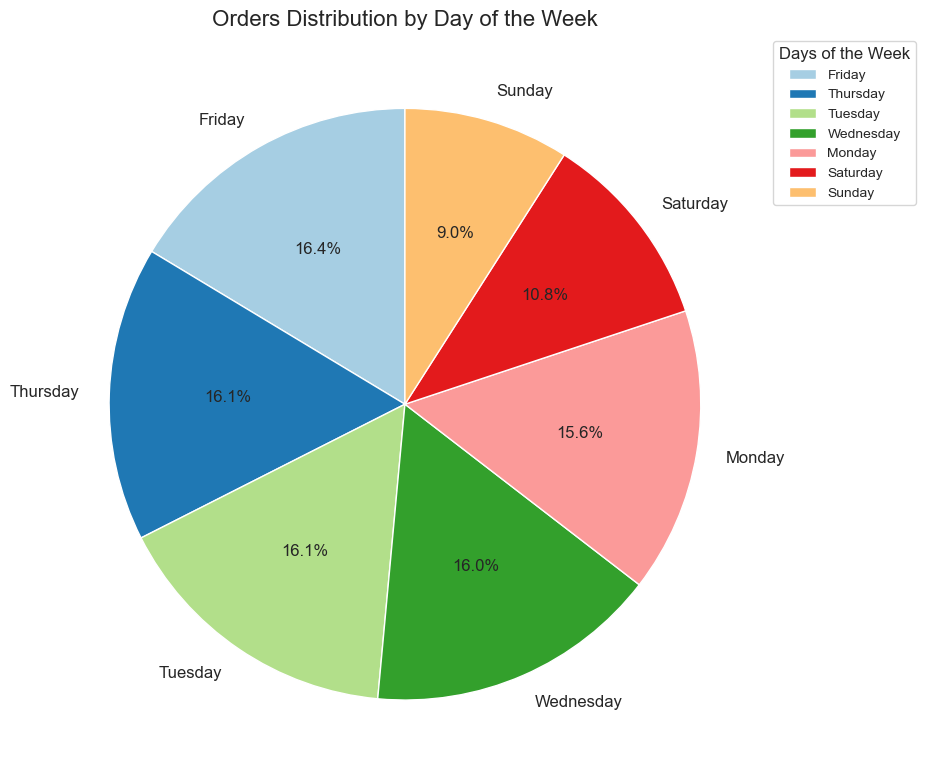

In [287]:
# Mock dataset creation based on provided structure 




 
# Grouping by day_of_week and counting orders 
orders_by_day = df["day_of_week"].value_counts() 
 
# Plot pie chart 
plt.figure(figsize=(10, 8)) 
colors = plt.cm.Paired.colors  # Use a visually appealing colormap 
orders_by_day.plot.pie( 
    autopct='%1.1f%%',  
    colors=colors,  
    startangle=90,  
    textprops={'fontsize': 12} 
) 
 
# Add title and legend 
plt.title('Orders Distribution by Day of the Week', fontsize=16) 
plt.ylabel('')  # Hide the default y-axis label 
plt.legend(orders_by_day.index, title="Days of the Week", loc="upper right", bbox_to_anchor=(1.2, 1.0), fontsize=10) 
 
plt.tight_layout() 
plt.show()

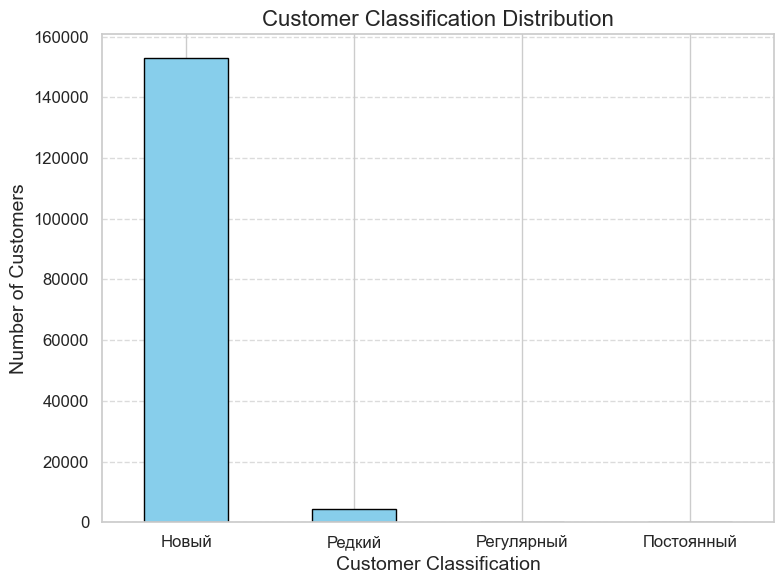

In [279]:

# Group data by customer classification 
class_counts = sorted_customers["customer_classification"].value_counts() 
 
# Plot bar chart for customer classification distribution 
plt.figure(figsize=(8, 6)) 
class_counts.plot.bar(color='skyblue', edgecolor='black') 
 
# Add labels and title 
plt.title('Customer Classification Distribution', fontsize=16) 
plt.xlabel('Customer Classification', fontsize=14) 
plt.ylabel('Number of Customers', fontsize=14) 
plt.xticks(rotation=0, fontsize=12) 
plt.yticks(fontsize=12) 
 
# Add grid for better readability 
plt.grid(axis='y', linestyle='--', alpha=0.7) 
 
plt.tight_layout() 
plt.show()

In [281]:
sorted_customers.head(5)
sorted_customers.info()
class_counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157697 entries, 0 to 157696
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   customer_id               157697 non-null  int64  
 1   purchase_count            157697 non-null  int64  
 2   customer_classification   157697 non-null  object 
 3   avg_products_per_order    157697 non-null  float64
 4   most_frequent_time        157697 non-null  int64  
 5   most_frequent_season      157697 non-null  int64  
 6   favority_entity_id        157697 non-null  int64  
 7   days_since_last_purchase  157697 non-null  int64  
 8   purchases_per_week        157697 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 10.8+ MB


customer_classification
Новый         153088
Редкий          4403
Регулярный       168
Постоянный        38
Name: count, dtype: int64

In [168]:
s = pd.DataFrame(sorted_customers).set_index('customer_id')

def plot_customer_data(idcustomer):
    # Проверка существования пользователя
    if idcustomer not in s.index:
        print(f"Пользователь с id {idcustomer} не найден.")
        return
    
    user_data = s.loc[idcustomer]
    
    # Создание фигуры
    plt.figure(figsize=(12, 6))

    # Построение графика для purchase_count
    plt.subplot(1, 2, 1)
    sns.barplot(x=[user_data.name], y=[user_data['purchase_count']], palette="viridis")
    plt.title(f'Количество покупок для пользователя ID {idcustomer}')
    plt.ylabel('Количество покупок')
    

    # Построение графика для avg_products_per_order
    plt.subplot(1, 2, 2)
    sns.barplot(x=[user_data.name], y=[user_data['avg_products_per_order']], palette="viridis")
    plt.title(f'Среднее количество продуктов на заказ для пользователя ID {idcustomer}')
    plt.ylabel('Среднее количество продуктов на заказ')
    # Добавление аннотации для типа пользователя между графиками
    plt.annotate(user_data['customer_classification'], 
                 xy=(0.5, 0.5),  # Центр между графиками
                 xytext=(0.5, 0.75),  # Положение выше центра
                 textcoords='axes fraction',  # Относительные координаты для осей
                 ha='center', fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))



    # Вывод информации о пользователе
    print(f"Классификация пользователя ID {idcustomer}: {user_data['customer_classification']}")
    print(f"Общее количество покупок: {user_data['purchase_count']}")
    print(f"Среднее количество продуктов за заказ: {user_data['avg_products_per_order']}")
    
    # Отображение графиков
    plt.tight_layout()
    plt.show()


Классификация пользователя ID 29645: Постоянный
Общее количество покупок: 1706
Среднее количество продуктов за заказ: 2.39943741209564


/var/folders/d0/tmdn3xk56ql7h6w6yt26xlsr0000gn/T/ipykernel_27451/3117534441.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[user_data.name], y=[user_data['purchase_count']], palette="viridis")
/var/folders/d0/tmdn3xk56ql7h6w6yt26xlsr0000gn/T/ipykernel_27451/3117534441.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[user_data.name], y=[user_data['avg_products_per_order']], palette="viridis")


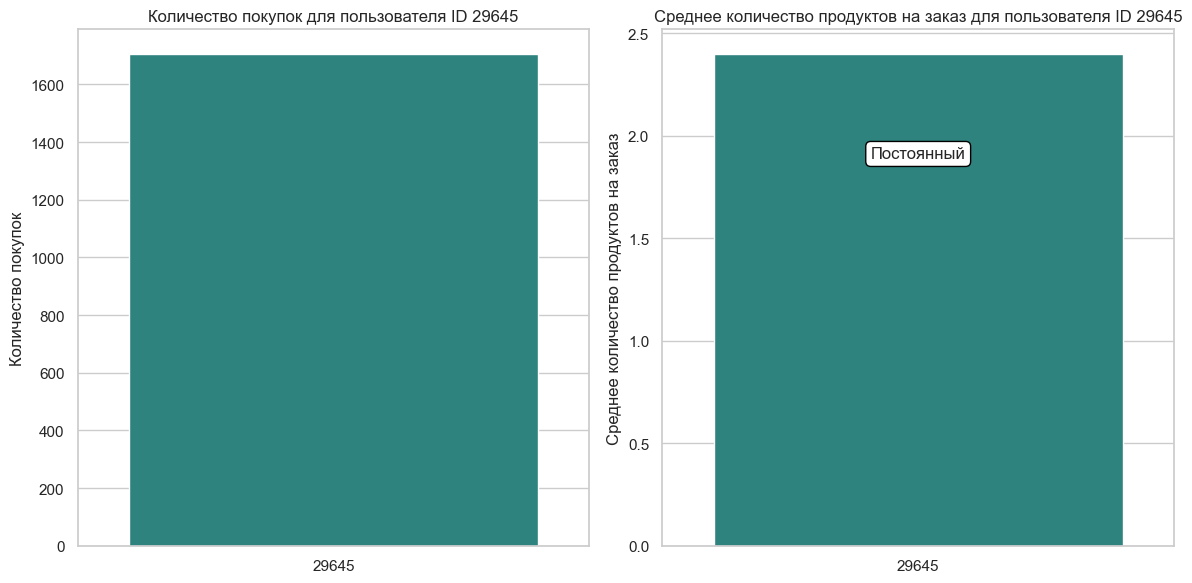

In [170]:
plot_customer_data(29645)

In [214]:
df.sort_values(by='create_datetime')


,id,order_id,customer_id,entity_id,create_datetime,season,time_period,days_since_last_purchase
0,2220916,1325312,9172,13,2019-04-24 17:20:56,4,3,618
1,2220917,1325312,9172,379,2019-04-24 17:20:56,4,3,618
2,2220918,1325312,9172,465,2019-04-24 17:20:56,4,3,618
3,2230948,1331271,9173,363,2019-04-25 21:10:36,4,3,617
4,2234582,1333417,9172,238,2019-04-26 12:27:35,4,1,616
...,...,...,...,...,...,...,...,...
2520741,7362348,4391477,134172,551,2021-01-01 21:47:52,3,3,0
2521050,7362360,4391482,81065,475,2021-01-01 22:04:14,3,3,0
2521049,7362361,4391482,81065,605,2021-01-01 22:04:14,3,3,0
2521048,7362362,4391482,81065,605,2021-01-01 22:04:14,3,3,0


In [ ]:
median_s = sel_unique2['frequency'].median()  # Вычисляем медиану для столбца frequency

# Фильтрация строк, где frequency больше медианного значения
count_greater_than_median = sel_unique2[sel_unique2['frequency'] > median_s].shape[0]

# Фильтрация строк, где frequency меньше медианного значения
count_less_than_median = sel_unique2[sel_unique2['frequency'] < median_s].shape[0]

# Вывод результатов
print(f"Количество строк, где frequency больше медианного: {count_greater_than_median}")
print(f"Количество строк, где frequency меньше медианного: {count_less_than_median}")



In [188]:
# Получаем наиболее частый временной интервал покупок и сезон
time_season_df = df.groupby('customer_id').agg(
    most_frequent_time=pd.NamedAgg(column='time_period', aggfunc=lambda x: x.mode()[0]),
    most_frequent_season=pd.NamedAgg(column='season', aggfunc=lambda x: x.mode()[0])
).reset_index()

# Объединяем с sorted_customers
sorted_customers = pd.merge(sorted_customers, time_season_df, on='customer_id', how='left')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157697 entries, 0 to 157696
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   customer_id              157697 non-null  int64  
 1   purchase_count           157697 non-null  int64  
 2   customer_classification  157697 non-null  object 
 3   avg_products_per_order   157697 non-null  float64
 4   most_frequent_time       157697 non-null  int64  
 5   most_frequent_season     157697 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 7.2+ MB


In [186]:
sorted_customers = sorted_customers.drop(columns=['most_frequent_season_y'])
sorted_customers = sorted_customers.drop(columns=['most_frequent_season_x'])
sorted_customers = sorted_customers.drop(columns=['most_frequent_time_x'])
sorted_customers = sorted_customers.drop(columns=['most_frequent_time_y'])

In [196]:
# Получаем наиболее частый временной интервал покупок и сезон
ent_df = df.groupby('customer_id').agg(
    most_f=pd.NamedAgg(column='entity_id', aggfunc=lambda x: x.mode()[0])
).reset_index()

# Объединяем с sorted_customers
sorted_customers = pd.merge(sorted_customers, ent_df, on='customer_id', how='left')

In [208]:
sorted_customers = sorted_customers.rename(columns={'most_f': 'favority_entity_id'})
sorted_customers.head()

,customer_id,purchase_count,customer_classification,avg_products_per_order,most_frequent_time,most_frequent_season,favority_entity_id
0,52078,2116,Постоянный,2.580488,3,3,541
1,9249,2011,Постоянный,3.385522,1,1,617
2,13914,1899,Постоянный,2.851351,3,2,66
3,29645,1706,Постоянный,2.399437,3,1,541
4,10321,1697,Постоянный,1.266418,1,1,541


In [210]:
# Устанавливаем дату последней покупки
last_purchase_date = pd.to_datetime('2021-01-01 22:54:59')

# Вычисляем разницу в днях между последней покупкой и датами создания в orders
df['days_since_last_purchase'] = (last_purchase_date - df['create_datetime']).dt.days

# Если вы хотите взять максимальное время последней покупки для каждого клиента
last_purchase_info = df.groupby('customer_id')['days_since_last_purchase'].max().reset_index()

# Объединяем информацию о днях с sorted_customers
sorted_customers = sorted_customers.merge(last_purchase_info, on='customer_id', how='left')


In [212]:
sorted_customers.head()

,customer_id,purchase_count,customer_classification,avg_products_per_order,most_frequent_time,most_frequent_season,favority_entity_id,days_since_last_purchase
0,52078,2116,Постоянный,2.580488,3,3,541,456
1,9249,2011,Постоянный,3.385522,1,1,617,564
2,13914,1899,Постоянный,2.851351,3,2,66,566
3,29645,1706,Постоянный,2.399437,3,1,541,518
4,10321,1697,Постоянный,1.266418,1,1,541,573


In [228]:
# Укажите период
start_date = '2021-01-01 22:54:59'
end_date = '2021-04-24 17:20:56'

# Фильтрация
filtered_data = df[(df['create_datetime'] >= start_date) & 
                                  (df['create_datetime'] <= end_date)]

# Группировка и подсчет количества покупок в неделю
filtered_data['week'] = filtered_data['create_datetime'].dt.to_period('W').astype(str)
purchase_count_per_week = filtered_data.groupby('customer_id')['week'].nunique().reset_index()

# Переименуем столбец
purchase_count_per_week.rename(columns={'week': 'purchases_per_week'}, inplace=True)

# Объединяем с оригинальным датафреймом
sorted_customers = sorted_customers.merge(purchase_count_per_week, on='customer_id', how='left')

# Заполнение NaN значениями (если не было покупок)
sorted_customers['purchases_per_week'] = sorted_customers['purchases_per_week'].fillna(0).astype(int)




        customer_id  purchase_count customer_classification  \
0             52078            2116              Постоянный   
1              9249            2011              Постоянный   
2             13914            1899              Постоянный   
3             29645            1706              Постоянный   
4             10321            1697              Постоянный   
...             ...             ...                     ...   
157692        67934               1                   Новый   
157693        67922               1                   Новый   
157694       138404               1                   Новый   
157695       138405               1                   Новый   
157696        62751               1                   Новый   

        avg_products_per_order  most_frequent_time  most_frequent_season  \
0                     2.580488                   3                     3   
1                     3.385522                   1                     1   
2              

/var/folders/d0/tmdn3xk56ql7h6w6yt26xlsr0000gn/T/ipykernel_27451/2232711322.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['week'] = filtered_data['create_datetime'].dt.to_period('W').astype(str)


In [216]:
df.head()

,id,order_id,customer_id,entity_id,create_datetime,season,time_period,days_since_last_purchase
0,2220916,1325312,9172,13,2019-04-24 17:20:56,4,3,618
1,2220917,1325312,9172,379,2019-04-24 17:20:56,4,3,618
2,2220918,1325312,9172,465,2019-04-24 17:20:56,4,3,618
3,2230948,1331271,9173,363,2019-04-25 21:10:36,4,3,617
4,2234582,1333417,9172,238,2019-04-26 12:27:35,4,1,616


In [ ]:
def classify_day_by_activity(day):
    if day in ['Пятница', 'Четверг','Среда', 'Вторник', 'Понедельник']:
        return 'Peak Day'
    elif day in ['Суббота', 'Воскресенье']:
        return 'Weekend Day'

# Применение к столбцу day_of_week
df['day_class'] = df['day_of_week'].apply(classify_day_by_activity)

In [265]:
sorted_customers.head()


,customer_id,purchase_count,customer_classification,avg_products_per_order,most_frequent_time,most_frequent_season,favority_entity_id,days_since_last_purchase,purchases_per_week
0,52078,2116,Постоянный,2.580488,3,3,541,456,0
1,9249,2011,Постоянный,3.385522,1,1,617,564,0
2,13914,1899,Постоянный,2.851351,3,2,66,566,0
3,29645,1706,Постоянный,2.399437,3,1,541,518,0
4,10321,1697,Постоянный,1.266418,1,1,541,573,0


In [253]:
# Сохраните файл
sorted_customers.to_csv('sorted_customers.csv')

In [251]:
!download sorted_customers.csv

zsh:1: command not found: download


In [ ]:
value_counts_pu = df['purchase_interval'].value_counts()
value_counts_pu

In [ ]:
df.sort_values(by='customer_id')

In [267]:
v = sorted_customers['customer_classification'].value_counts()
v

customer_classification
Новый         153088
Редкий          4403
Регулярный       168
Постоянный        38
Name: count, dtype: int64

In [ ]:
df = df.drop(columns=['prev_purchase'])


df = df.drop(columns=['purchase_interval'])


In [ ]:
df

In [ ]:
df.sort_values(by='customer_id')

In [ ]:
recent_days_threshold = 30
active_interval_threshold = 18
churned_threshold = 30
inactive_frequency_threshold = 1  # Для редко покупающих


In [ ]:
df

In [ ]:
# Создание графика
plt.figure(figsize=(10, 6))
sns.histplot(df['purchase_interval'], bins=30, kde=True)  # kde=True добавляет линию плотности
plt.title('Распределение purchase_interval')
plt.xlabel('Интервал покупок (дни)')
plt.ylabel('Частота')
plt.xlim(0, 100)

plt.grid(True)
plt.show()


In [ ]:
# Предполагаем, что вы уже создали value_counts_pu
value_counts_pu = df['purchase_interval'].value_counts()

# Выводим первые 10 значений
top_10 = value_counts_pu.head(10)
print(top_10)


In [255]:
df.head(5)

,id,order_id,customer_id,entity_id,create_datetime,season,time_period,days_since_last_purchase,day_of_week
0,2220916,1325312,9172,13,2019-04-24 17:20:56,4,3,618,Wednesday
1,2220917,1325312,9172,379,2019-04-24 17:20:56,4,3,618,Wednesday
2,2220918,1325312,9172,465,2019-04-24 17:20:56,4,3,618,Wednesday
3,2230948,1331271,9173,363,2019-04-25 21:10:36,4,3,617,Thursday
4,2234582,1333417,9172,238,2019-04-26 12:27:35,4,1,616,Friday


In [ ]:
df = df.sort_values(by='create_datetime',ascending=False)
df.head(8)


In [261]:
v = df['time_period'].value_counts()

time_period
1    1100293
2     606804
3     566369
4     247455
5        157
Name: count, dtype: int64